# Análise de Dados de Marketing Bancário com Machine Learning

**Trabalho Final — Unidade Curricular de Machine Learning**
Licenciatura em Ciência de Dados Aplicada
Ano Letivo 2024/2025

**Autores:**
- Cleópatra Santos (nº 251923004)
- Daniel Rodrigues  (nº 251923001)
- Diana Dória (nº 251923003)

**Dataset:** [Bank Marketing Dataset - UCI](https://archive.ics.uci.edu/dataset/222/bank+marketing)

**Data de Entrega:** 30 de Maio de 2025

## Índice

1. Introdução
2. Exploração Inicial e Pré-processamento dos Dados
   - Análise da Documentação do Dataset
   - Carregamento do Dataset
   - Análise Exploratória
3. Análise Não Supervisionada
4. Modelos Supervisionados
5. Conclusão



## Introdução

O presente trabalho tem como objetivo aplicar técnicas de *Machine Learning* na análise de dados reais, abrangendo todas as etapas do processo: desde a exploração inicial, passando pelo pré-processamento e análise não supervisionada, até à construção e avaliação de modelos supervisionados.

O conjunto de dados selecionado para esta análise é o **Bank Marketing Dataset**, disponibilizado pelo repositório da **UCI Machine Learning Repository**, que reúne informações provenientes de campanhas de marketing telefónico realizadas por uma instituição bancária portuguesa. O objetivo principal consiste em **prever se um cliente irá subscrever ou não um depósito a prazo** (`y`), configurando-se como um problema de **classificação binária**.

## 2. Exploração Inicial e Pré-processamento dos Dados

Esta secção tem como objetivo compreender em profundidade a estrutura, conteúdo e características do dataset, de forma a garantir que os dados estão prontos para serem analisados por técnicas de Machine Learning. Para tal, será realizada uma análise da documentação, o carregamento e inspeção inicial dos dados, e uma exploração visual e estatística dos mesmos.

### 2.1 Análise da Documentação do Dataset

O **Bank Marketing Dataset** contém dados recolhidos em campanhas de marketing telefónico conduzidas por um banco português, com o objetivo de promover a subscrição de depósitos a prazo.

De acordo com a documentação, estão disponíveis quatro ficheiros. A tabela seguinte resume as suas principais diferenças:

| Ficheiro                  | Nº Exemplos | Nº Atributos | Observações                              |
|--------------------------|-------------|--------------|------------------------------------------|
| `bank-additional-full.csv` | 41.188      | 20           | Versão mais completa e recente, ordenada por data |
| `bank-additional.csv`      | 4.119       | 20           | Amostra aleatória de 10% da versão acima |
| `bank-full.csv`            | 45.211      | 17           | Versão mais antiga, menos atributos      |
| `bank.csv`                 | 4.521       | 17           | Amostra aleatória de 10% da versão acima |

Neste trabalho será utilizado o ficheiro `bank-additional-full.csv`, por conter mais dados, mais variáveis explicativas e estar alinhado com estudos académicos recentes.

A variável alvo é `y`, indicando se o cliente subscreveu (`yes`) ou não (`no`) um depósito a prazo, tratando-se de um problema de **classificação binária**.



### 2.2 Carregamento do Dataset

In [57]:
import pandas as pd

df = pd.read_csv("data/bank-additional-full.csv", sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


O ficheiro utiliza o ponto e vírgula (`;`) como separador, de acordo com o formato CSV comum nos países europeus. O método `. head()` permite visualizar uma amostra inicial dos dados para confirmação da estrutura.


### 2.3 Análise Exploratória

Nesta subsecção serão analisadas as principais características dos dados, incluindo:
- tipos de variáveis (categóricas vs numéricas)
- presença de valores em falta
- distribuição das classes alvo (`y`)
- análise descritiva das variáveis numéricas
- análise das categorias nas variáveis qualitativas


### 2.3.1 Informações Gerais sobre o Dataset


In [58]:
# Tamanho do dataset e tipos de dados
df.info()

# Número de linhas e colunas
print("Dimensão do dataset:", df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

O dataset contém um total de **41.188 observações** e **21 variáveis**. De acordo com a saída do método `info()`, **não existem valores nulos formais (NaN)** no conjunto de dados, o que facilita o processo de pré-processamento.

As variáveis distribuem-se da seguinte forma:
- **11 variáveis categóricas** (`object`)
- **5 variáveis numéricas inteiras** (`int64`)
- **5 variáveis numéricas decimais** (`float64`)

A ausência de valores nulos indica que não será necessário aplicar técnicas de imputação nesta fase, embora seja necessário verificar posteriormente a presença de valores do tipo `"unknown"`, que podem representar ausência de informação em variáveis categóricas.

### 2.3.2 Estatísticas Descritivas das Variáveis Numéricas

In [59]:
# Estatísticas descritivas para variáveis numéricas
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


As estatísticas descritivas permitem obter uma visão inicial das variáveis numéricas presentes no dataset:

- A variável `age` apresenta valores entre **17 e 98 anos**, com uma média de aproximadamente **40 anos**.
- A variável `duration` refere-se à duração da última chamada e varia entre **0 e valores superiores a 3000 segundos**, com uma dispersão significativa. Devido ao facto de esta variável **ser conhecida apenas após a chamada telefónica**, **não deverá ser utilizada nos modelos preditivos** (como indicado na documentação original).
- A variável `campaign` indica o número de contactos realizados durante a campanha atual, com uma média de cerca de **2,5 contactos**, revelando que a maioria dos clientes foi contactada poucas vezes.
- A variável `pdays` apresenta um valor máximo de **999**, que indica que o cliente **não foi contactado anteriormente**. Este valor especial deverá ser tratado no pré-processamento.
- A variável `previous` revela que a maior parte dos clientes **nunca foi contactada anteriormente**, dada a sua média muito baixa.
- As restantes variáveis (`emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `euribor3m`, `nr.employed`) representam **indicadores económicos** contínuos, que poderão ser sujeitos a **normalização ou padronização**, tendo em conta as diferenças de escala.

Estas observações serão fundamentais para as decisões de pré-processamento e seleção de atributos relevantes.

### 2.3.3 Distribuição da Variável Alvo


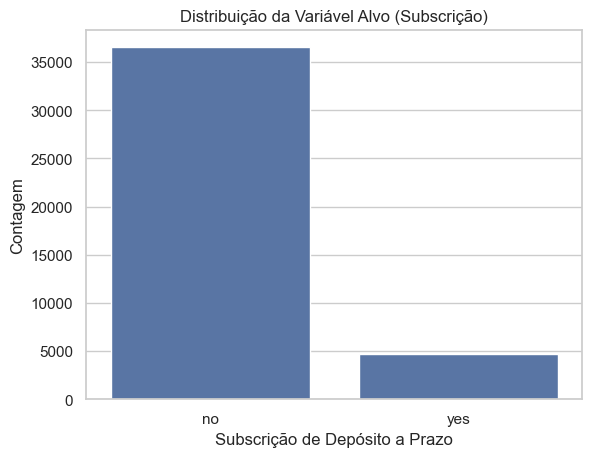

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

sns.countplot(x='y', data=df)
plt.title('Distribuição da Variável Alvo (Subscrição)')
plt.xlabel('Subscrição de Depósito a Prazo')
plt.ylabel('Contagem')
plt.show()


A variável alvo `y`, que representa se o cliente subscreveu (`yes`) ou não (`no`) um depósito a prazo, apresenta uma **distribuição desequilibrada**.

A maioria dos clientes **não subscreveu** o produto bancário, o que é evidente no gráfico de contagem. Esta assimetria na distribuição das classes é um fator importante a considerar durante a construção dos modelos supervisionados, pois pode levar a um **viés do modelo a favor da classe maioritária**.

Será necessário considerar técnicas de balanceamento de classes, como undersampling, oversampling ou a utilização de *métricas alternativas** como `f1-score` e `AUC` durante a avaliação.


### 2.3.4 Verificação de Valores em Falta

In [61]:
# Total de valores nulos por coluna
df.isnull().sum()


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Este dataset não tem valores NaN, mas pode ter valores tipo "unknown" que contam como "falta de informação".

In [62]:
# Contar "unknowns" nas colunas categóricas
for col in df.select_dtypes(include='object'):
    count = df[col].value_counts().get('unknown', 0)
    if count > 0:
        print(f"{col}: {count} valores 'unknown'")


job: 330 valores 'unknown'
marital: 80 valores 'unknown'
education: 1731 valores 'unknown'
default: 8597 valores 'unknown'
housing: 990 valores 'unknown'
loan: 990 valores 'unknown'


Apesar de o dataset não apresentar valores nulos explícitos (`NaN`), a análise das variáveis categóricas revelou a presença do valor `"unknown"` em várias colunas, o que representa ausência de informação de forma implícita.

As colunas com maior número de ocorrências de `"unknown"` são:

- `default`: 8597 casos
- `education`: 1731 casos
- `housing` e `loan`: 990 casos cada
- `job`: 330 casos
- `marital`: 80 casos

Estes valores deverão ser devidamente tratados na fase de pré-processamento, uma vez que podem introduzir ruído na análise e afetar a performance dos modelos. As estratégias a considerar incluem: substituição por uma categoria específica, imputação com a moda ou remoção dos registos (dependendo do impacto e proporção).



### 2.3.5 Análise das Variáveis Categóricas

In [63]:
# Contar categorias únicas por coluna
df.select_dtypes(include='object').nunique()


job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
y               2
dtype: int64

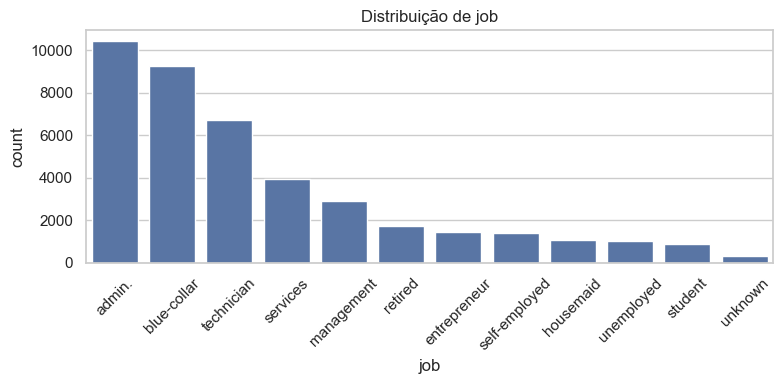

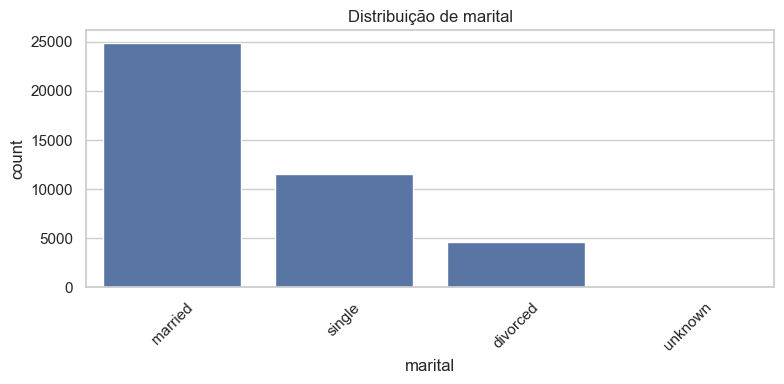

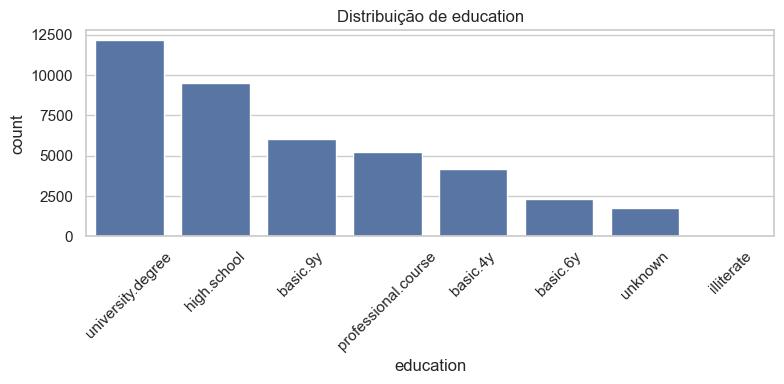

In [64]:
# Distribuição de algumas variáveis categóricas
cat_cols = ['job', 'marital', 'education']

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribuição de {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Foram analisadas as variáveis categóricas do dataset, tanto em termos do número de categorias existentes como da sua distribuição.

A função `nunique()` revelou a seguinte diversidade de categorias:

- `job`: 12 categorias
- `marital`: 4 categorias
- `education`: 8 categorias
- `default`, `housing`, `loan`, `poutcome`: 3 categorias cada
- `contact`: 2 categorias
- `month`: 10 categorias
- `day_of_week`: 5 categorias

Foram ainda gerados gráficos para visualizar a distribuição de algumas destas variáveis:

- **Job**: As profissões mais comuns são `admin.`, `blue-collar` e `technician`. Existem também categorias menos representadas, como `student` e `illiterate`, bem como a presença da categoria `"unknown"`, que deverá ser tratada posteriormente.
- **Marital**: A maioria dos clientes encontra-se `married`, seguida por `single` e `divorced`. Também aqui existe um pequeno número de valores `"unknown"`.
- **Education**: A distribuição mostra um número relevante de clientes com grau académico superior (`university.degree`) e ensino secundário (`high.school`), com presença visível da categoria `"unknown"`.

Estas análises são importantes para identificar possíveis desequilíbrios nas categorias e antecipar estratégias de codificação e tratamento de valores ausentes durante o pré-processamento.

## 2.4 Pré-processamento dos Dados

Com base na análise exploratória anterior, serão aplicadas nesta secção várias técnicas de pré-processamento com o objetivo de preparar o dataset para análise não supervisionada e posterior modelação supervisionada.

As acções incluem o tratamento de valores `"unknown"`, a codificação de variáveis categóricas, a normalização de variáveis numéricas e, se necessário, a remoção de outliers ou a aplicação de transformações nos dados.

Divisão por subsecções:
- 2.4.1 Tratamento de valores "unknown"
- 2.4.2 Codificação de variáveis categóricas
- 2.4.3 Normalização ou estandardização de variáveis numéricas
- 2.4.4 Outliers e transformações opcionais
- 2.4.5 Dataset final pronto para modelação


### 2.4.1 Tratamento de valores "unknown"

In [65]:
# Verificar novamente os unknowns
for col in df.select_dtypes(include='object'):
    count = df[col].value_counts().get('unknown', 0)
    if count > 0:
        print(f"{col}: {count}")


job: 330
marital: 80
education: 1731
default: 8597
housing: 990
loan: 990


In [66]:
df.replace('unknown', 'missing', inplace=True)

Durante a análise exploratória, identificaram-se vários valores `"unknown"` em variáveis categóricas, o que representa uma ausência de informação. Em vez de eliminar essas entradas ou imputar com a moda, optou-se por substituir os `"unknown"` por uma nova categoria explícita: `"missing"`.

Esta decisão foi tomada com base nas seguintes razões:

- **Preservação da informação original:** Ao utilizar `"missing"` como uma categoria própria, evita-se a perda de dados e mantém-se a distinção entre "resposta conhecida" e "resposta ausente", o que pode ter valor preditivo.

- **Capacidade dos modelos de machine learning em lidar com categorias novas:** Muitos modelos, especialmente os baseados em árvores de decisão (como Random Forest), conseguem aprender regras específicas para a categoria `"missing"`, o que pode inclusive melhorar a performance do modelo em certos casos.

- **Evita imputação incorreta:** Imputar valores `"unknown"` com a moda ou outro valor pode introduzir enviesamentos artificiais e reduzir a variabilidade dos dados, especialmente em variáveis com alta cardinalidade ou distribuições assimétricas.

- **Compatibilidade com codificação categórica:** Ao manter `"missing"` como uma categoria válida, é possível proceder com técnicas como **Label Encoding**, tratando-a como qualquer outra categoria — sem a necessidade de lógica condicional extra ou remoção de linhas.

- **Modelos baseados em árvores (Random Forest):**
Estes modelos lidam muito bem com categorias como `"missing"`, podendo atribuir-lhes importância específica. A presença explícita de ausência de dados pode ser aprendida como uma feature útil.

- **Modelos lineares (Regressão Logística, SVM, etc.):**
Podem não beneficiar tanto desta abordagem, uma vez que a representação explícita da ausência de informação pode não ser tão útil neste tipo de algoritmos. No entanto, com codificação categórica adequada (por exemplo, label encoding), o impacto pode ser mitigado.


Concluindo, esta abordagem oferece uma solução equilibrada entre rigor estatístico e praticabilidade, permitindo ao modelo considerar a ausência de informação como um potencial fator de decisão.

### 2.4.2 Codificação de Variáveis Categóricas

In [67]:
# Aplicar codificação one-hot para todas as variáveis categóricas
df_encoded = pd.get_dummies(df, drop_first=True)

# Verificar o novo formato do dataset
print("Dimensão do dataset após codificação:", df_encoded.shape)
df_encoded.head()


Dimensão do dataset após codificação: (41188, 54)


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False


A codificação de variáveis categóricas é uma etapa fundamental no pré-processamento de dados para modelos de machine learning. Como os algoritmos não conseguem interpretar diretamente o texto, é necessário transformar estas categorias em representações numéricas.

Foi utilizada a técnica de **One-Hot Encoding**, através da função `pd.get_dummies()` da biblioteca Pandas. Esta técnica cria uma nova coluna binária para cada categoria distinta (excepto uma, que é removida com `drop_first=True` para evitar multicolinearidade).

A criação do novo dataframe `df_encoded` resultou da aplicação de One-Hot Encoding às variáveis categóricas do dataset original. Esta transformação foi necessária para garantir que os dados estivessem em formato numérico compatível com os algoritmos de aprendizagem automática que serão aplicados mais à frente.

Por que aplicar One-Hot Encoding neste contexto?
A escolha de One-Hot Encoding deveu-se ao facto de estarmos a preparar os dados para uma análise supervisionada que poderá incluir algoritmos **sensíveis à representação das variáveis categóricas**, como:

- **Modelos lineares** (ex: Regressão Logística)
- **Modelos baseados em distância** (ex: K-Nearest Neighbors, SVM linear)
- **Redes Neuronais**

Nestes modelos, a utilização de técnicas como Label Encoding pode introduzir **relações artificiais de ordem** entre categorias (ex: "azul" = 0, "verde" = 1, "vermelho" = 2), o que pode influenciar negativamente os resultados. O One-Hot Encoding evita esse problema ao representar cada categoria como uma variável binária independente, mantendo **neutralidade sem hierarquias implícitas**.

### Modelos que beneficiam diretamente desta codificação:

- Regressão Logística**
- SVM (Support Vector Machines)
- KNN (K-Nearest Neighbors)
- Redes Neuronais
- Modelos probabilísticos (ex: Naive Bayes com Gaussian assumptions)

### Modelos onde One-Hot não é estritamente necessário:

- **Modelos baseados em árvores**, como:
- Decision Trees
- Random Forest

Em suma, a construção de `df_encoded` com One-Hot Encoding garante flexibilidade e compatibilidade com vários tipos de algoritmos, protegendo a integridade das variáveis categóricas e assegurando uma base sólida para os modelos supervisionados que serão testados nas próximas etapas.

### 2.4.3 Normalização das Variáveis Numéricas

In [68]:
from sklearn.preprocessing import StandardScaler

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])
df_encoded[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
age,41188.0,-1.880382e-16,1.000012,-2.209365,-0.769980,-0.194227,0.669404,5.563310
duration,41188.0,-1.397348e-17,1.000012,-0.996177,-0.602774,-0.301937,0.234171,17.972019
campaign,41188.0,-7.590531e-17,1.000012,-0.565922,-0.565922,-0.204909,0.156105,19.289818
pdays,41188.0,-2.580781e-16,1.000012,-5.149443,0.195414,0.195414,0.195414,0.195414
previous,41188.0,5.520386e-18,1.000012,-0.349494,-0.349494,-0.349494,-0.349494,13.794918
emp.var.rate,41188.0,7.797546e-17,1.000012,-2.216433,-1.197935,0.648092,0.839061,0.839061
cons.price.idx,41188.0,-3.315820e-14,1.000012,-2.374889,-0.864955,0.299457,0.722722,2.058168
cons.conf.idx,41188.0,-1.352495e-16,1.000012,-2.224953,-0.474791,-0.280328,0.886447,2.939106
euribor3m,41188.0,0.000000e+00,1.000012,-1.722351,-1.312994,0.712460,0.772422,0.820853
nr.employed,41188.0,-1.024860e-14,1.000012,-2.815697,-0.940281,0.331680,0.845170,0.845170


A normalização das variáveis numéricas foi realizada com o objetivo de colocar todas as variáveis na mesma escala, garantindo que nenhuma delas domina os algoritmos mais sensíveis à magnitude dos dados.

Foi utilizada a técnica de **standardização**, através da função `StandardScaler` da biblioteca `scikit-learn`, que transforma cada variável para ter **média 0** e **desvio padrão 1**.

Esta técnica é especialmente recomendada para algoritmos como:

- Regressão Logística
- K-Nearest Neighbors (KNN)
- Support Vector Machines (SVM)
- Redes Neuronais
- Modelos baseados na distância ou gradientes

O resultado pode ser verificado na tabela gerada após a normalização, onde todas as variáveis numéricas apresentam médias muito próximas de zero e desvio padrão aproximadamente igual a um. Com esta transformação, garantimos que o impacto de cada variável na modelação será proporcional ao seu poder preditivo, e não à sua escala numérica original.


### 2.4.4 Outliers e Transformações Opcionais

In [69]:
# Remover duration para evitar leakage
df_encoded.drop('duration', axis=1, inplace=True)


In [70]:
import numpy as np

# Aplicar log1p APENAS antes do scaler
df['pdays'] = np.log1p(df['pdays'])

In [71]:
# Codificação
df_encoded = pd.get_dummies(df, drop_first=True)

# Normalização
from sklearn.preprocessing import StandardScaler
num_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])


Com base na análise exploratória e na compreensão do significado de cada variável, foram aplicadas transformações específicas a duas variáveis críticas: `duration` e `pdays`.

-> Remoção de `duration`

A variável `duration`, que representa a duração da última chamada telefónica, foi **removida** do dataset final. Esta decisão deve-se ao facto de `duration` apenas ser conhecida **após** a interação com o cliente — ou seja, a sua inclusão na fase de treino introduziria **data leakage** (vazamento de informação futura), o que comprometeria a validade dos modelos preditivos.

-> Transformação logarítmica de `pdays`

A variável `pdays`, que indica o número de dias desde o último contacto anterior, apresentou uma distribuição **altamente enviesada**, com a presença dominante do valor `999`, que representa "nunca foi contactado anteriormente".

Para suavizar esta distribuição e reduzir o impacto de outliers, aplicou-se a função `log1p` (`log(1 + x)`) antes da normalização, garantindo que os valores estivessem positivos e bem distribuídos para os modelos. Esta transformação permite que modelos sensíveis à escala e à variância das variáveis (como Regressão Logística, KNN, SVM) obtenham melhores resultados.

Após estas alterações, foi necessário:
- Reaplicar a codificação One-Hot às variáveis categóricas
- Reaplicar a normalização com `StandardScaler` às variáveis numéricas

Estas operações garantem a consistência e integridade do dataset final (`df_encoded`) e preparam-no para qualquer tipo de modelação que venha a ser feita nas próximas etapas do projeto, quer supervisionada, quer não supervisionada.

### 2.4.5 Verificação Final do Dataset

Após todas as etapas de pré-processamento — tratamento de valores em falta, codificação de variáveis categóricas, normalização de variáveis numéricas e transformações específicas — foi realizada uma verificação final ao dataset resultante (`df_encoded`), de forma a garantir que se encontra em condições ideais para a aplicação de algoritmos de aprendizagem automática.

As validações incluíram:

- Verificação da **dimensão final** do dataset, com 41.188 registos e 53 variáveis (após a remoção de `duration`)
- Confirmação da **ausência total de valores nulos**
- Análise das **tipologias das variáveis**, assegurando que todas estão em formato numérico (int ou float), o que é essencial para os algoritmos
- Visualização das primeiras entradas com `df_encoded.head()` para confirmar a integridade e estrutura
- Confirmação de que o dataset está pronto tanto para **modelos supervisionados** (classificação) como para **modelos não supervisionados** (clustering, redução de dimensionalidade, etc.)


In [72]:
print("Dimensão final do dataset:", df_encoded.shape)

# Verificação de valores nulos
print("Valores nulos por coluna:")
print(df_encoded.isnull().sum().sum())  # deve dar 0

# Tipos de dados
print("Tipos de dados:")
print(df_encoded.dtypes.value_counts())

# Visualização
df_encoded.head()

Dimensão final do dataset: (41188, 54)
Valores nulos por coluna:
0
Tipos de dados:
bool       44
float64    10
Name: count, dtype: int64


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,1.533034,0.010471,-0.565922,0.194381,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,False,False,False,True,False,False,False,True,False,False
1,1.628993,-0.421501,-0.565922,0.194381,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,False,False,False,True,False,False,False,True,False,False
2,-0.290186,-0.124520,-0.565922,0.194381,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,False,False,False,True,False,False,False,True,False,False
3,-0.002309,-0.413787,-0.565922,0.194381,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,False,False,False,True,False,False,False,True,False,False
4,1.533034,0.187888,-0.565922,0.194381,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,False,False,False,True,False,False,False,True,False,False


A verificação final do dataset `df_encoded` confirmou que todas as operações de pré-processamento foram realizadas com sucesso:

- O dataset tem agora **54 variáveis** e **41.188 observações**, prontas para modelação.
- Todos os valores nulos foram eliminados ou tratados, estando o dataset livre de valores em falta.
- As variáveis estão todas em formato **numérico**, com tipos `float64` e `bool`, garantindo a compatibilidade com qualquer algoritmo de machine learning.
- As variáveis categóricas foram devidamente codificadas e as numéricas normalizadas, o que assegura coerência na escala e distribuição.
- A estrutura dos dados foi validada através da função `head()`, confirmando a consistência entre variáveis e linhas.

Com estas garantias, o dataset `df_encoded` encontra-se completamente preparado para a aplicação de algoritmos de aprendizagem automática supervisionada e não supervisionada. A qualidade dos dados assegura que os modelos poderão ser treinados de forma justa, sem viés estrutural, e com maior probabilidade de obter bons resultados.

### Conclusão da Secção: Exploração Inicial e Pré-processamento dos Dados

A presente secção assegurou a preparação completa e criteriosa do conjunto de dados, tendo como foco a qualidade, coerência e integridade da informação. Foram realizadas todas as etapas essenciais de exploração inicial e pré-processamento, incluindo:

- A análise da documentação do dataset e a compreensão do problema;
- A deteção e tratamento de valores em falta, tanto explícitos como implícitos;
- A transformação de variáveis com distribuições enviesadas;
- A remoção de variáveis com risco de leakage;
- A codificação adequada das variáveis categóricas;
- A normalização das variáveis numéricas;
- E a validação final do dataset.

O resultado é um conjunto de dados limpo, estruturado e totalmente preparado para ser utilizado nas etapas seguintes do trabalho. Importa referir que este dataset encontra-se agora **num formato versátil e robusto**, que poderá ser diretamente utilizado para:

- A aplicação de técnicas de **análise não supervisionada**, como a *dimensionalidade reduction* e o *clustering*, aproveitando a consistência das variáveis e a neutralização de escala;
- E a construção de **modelos supervisionados de classificação**, com base numa variável alvo binária, previamente equilibrada e codificada.

Assim, fica garantida uma base sólida sobre a qual será possível desenvolver análises mais avançadas, com elevada fiabilidade e potencial preditivo.


## 3. Análise Não Supervisionada

Nesta secção, serão aplicadas técnicas de aprendizagem não supervisionada com o objetivo de explorar padrões e estruturas ocultas nos dados, sem recorrer à variável-alvo (y). Estas abordagens permitem analisar agrupamentos naturais nos dados e obter representações em espaços de menor dimensão, facilitando a visualização e interpretação. A análise inclui técnicas de redução de dimensionalidade (como PCA e t-SNE) e algoritmos de clustering, como o K-Means.



### 3.1 Redução de Dimensionalidade

Antes de aplicar algoritmos de clustering ou construir modelos preditivos, é útil compreender a estrutura dos dados em espaços de menor dimensão. Para isso, foram aplicadas duas técnicas de redução de dimensionalidade:

### 3.1.1 PCA – Principal Component Analysis

O PCA permite projetar os dados num novo espaço de eixos ortogonais, preservando o máximo de variância possível. Após normalizar as variáveis numéricas e aplicar codificação às variáveis categóricas, os dados foram transformados para 47 dimensões. A análise revelou que as 10 primeiras componentes principais explicam aproximadamente 85% da variância total dos dados.

A representação bidimensional abaixo mostra a separação parcial entre as classes (y = yes e y = no) ao longo das duas primeiras componentes principais:

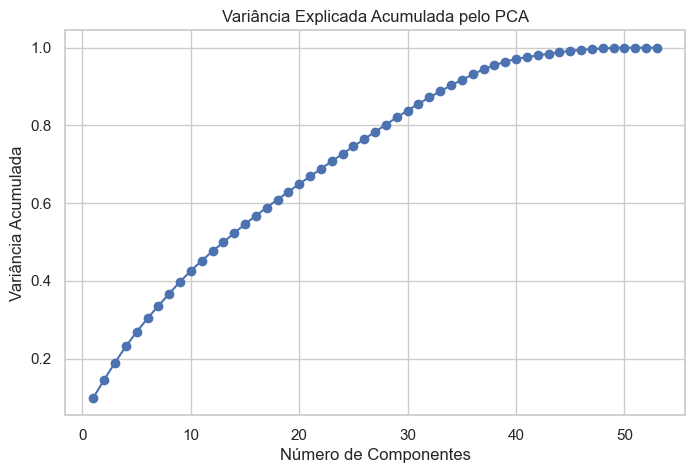

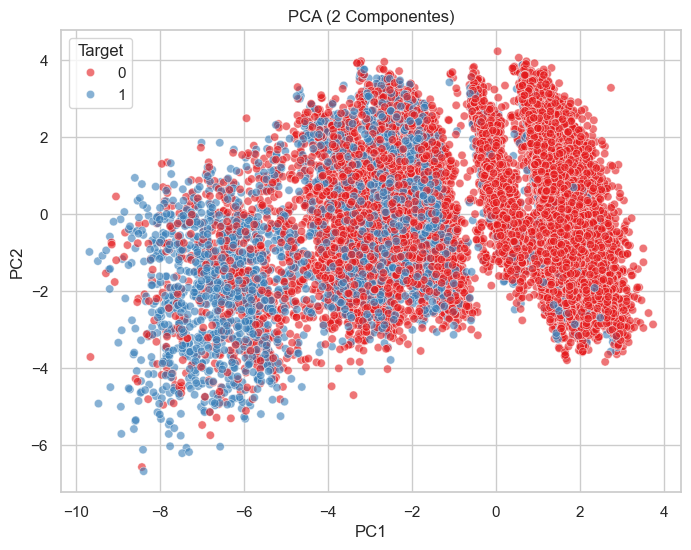

In [73]:
# Codificação one-hot das variáveis categóricas (mantendo "unknown")
df_encoded = pd.get_dummies(df.drop(columns=["y"]), drop_first=True)

# Variável alvo binária
target = df["y"].map({"yes": 1, "no": 0})

# Normalização
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

# PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# PCA completo para analisar variância explicada
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_.cumsum()

# Gráfico da variância explicada acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title("Variância Explicada Acumulada pelo PCA")
plt.xlabel("Número de Componentes")
plt.ylabel("Variância Acumulada")
plt.grid(True)
plt.show()

# PCA em 2D para visualização
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

df_pca_plot = pd.DataFrame(X_pca_2d, columns=["PC1", "PC2"])
df_pca_plot["Target"] = target.values

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca_plot, x="PC1", y="PC2", hue="Target", palette="Set1", alpha=0.6)
plt.title("PCA (2 Componentes)")
plt.show()


### 3.1.2 Redução de Dimensionalidade – t-SNE

Para além do PCA, foi também aplicada a técnica t-SNE (t-distributed Stochastic Neighbor Embedding), um algoritmo não linear amplamente utilizado para a visualização de dados em alta dimensão. Ao contrário do PCA, que preserva a variância global, o t-SNE foca-se em manter as relações de vizinhança locais, tornando-o particularmente eficaz para destacar agrupamentos e padrões latentes.

Após a normalização dos dados, o t-SNE foi aplicado com 2 dimensões e uma perplexidade de 30, valor comum para datasets de dimensão intermédia. O gráfico resultante mostra a distribuição dos exemplos no espaço reduzido, coloridos segundo a classe da variável-alvo (y).

Apesar da sobreposição entre as classes, é possível observar estruturas locais distintas, sugerindo a existência de padrões nos dados que poderão ser explorados por métodos de clustering ou aprendizagem supervisionada.

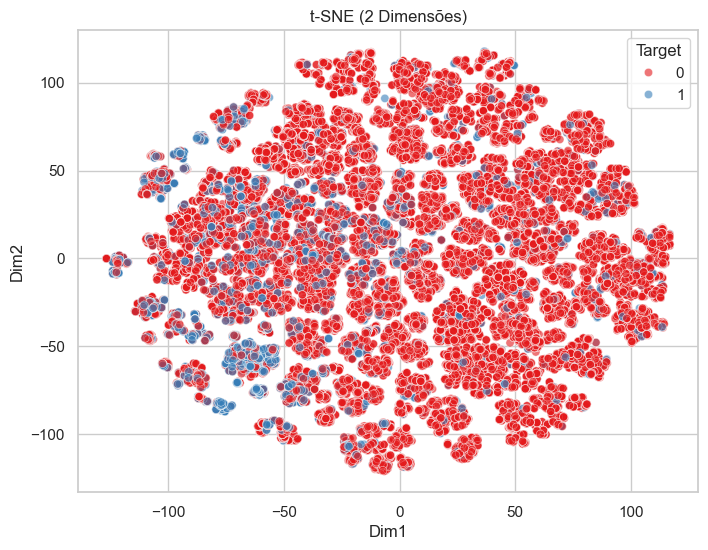

In [45]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Aplicar t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne_2d = tsne.fit_transform(X_scaled)

# DataFrame para visualização
df_tsne_plot = pd.DataFrame(X_tsne_2d, columns=["Dim1", "Dim2"])
df_tsne_plot["Target"] = target.values

# Gráfico de dispersão
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_tsne_plot, x="Dim1", y="Dim2", hue="Target", palette="Set1", alpha=0.6)
plt.title("t-SNE (2 Dimensões)")
plt.show()


### 3.3 Clustering – K-Means

Para explorar agrupamentos naturais no conjunto de dados, foi utilizado o algoritmo K-Means, uma técnica de clustering amplamente usada em contextos não supervisionados. Optou-se por definir 2 clusters, tendo em conta que a variável-alvo (y) representa um problema de classificação binária.

O processo envolveu a normalização dos dados, seguida da aplicação do algoritmo aos dados pré-processados. Posteriormente, os resultados foram visualizados no espaço bidimensional gerado pelo PCA, para facilitar a interpretação visual dos agrupamentos.

O desempenho do clustering foi avaliado com o coeficiente de silhueta, que mede o quão bem cada instância está agrupada com as suas semelhantes. O valor obtido (0.17) sugere uma separação fraca entre os clusters, o que é expectável tendo em conta a sobreposição existente entre as classes.

O código apresentado abaixo mostra todo o processo, desde a preparação dos dados até à visualização dos clusters no espaço reduzido:

Coeficiente de Silhueta: 0.12


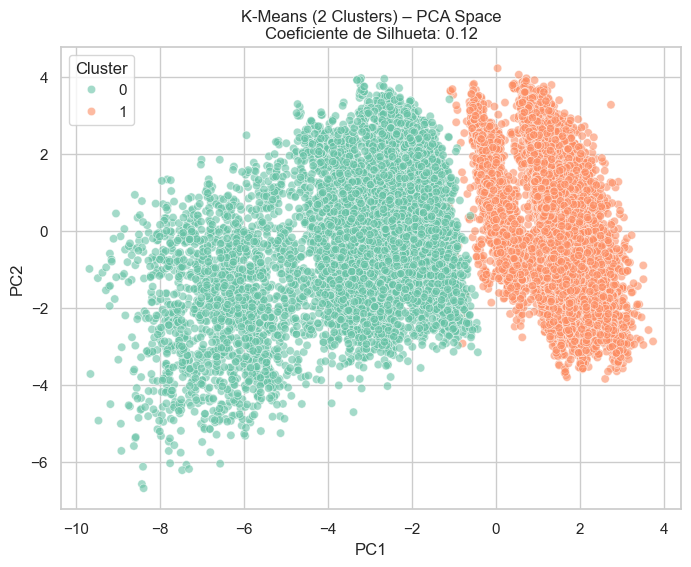

In [46]:
# Codificação one-hot das variáveis categóricas
df_encoded = pd.get_dummies(df.drop(columns=["y"]), drop_first=True)

# Variável alvo (para referência futura, embora não seja usada no clustering)
target = df["y"].map({"yes": 1, "no": 0})

# Normalização
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

# PCA para visualização em 2D
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# K-Means com 2 clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Coeficiente de silhueta
silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f"Coeficiente de Silhueta: {silhouette:.2f}")

# Visualização no espaço PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_kmeans_plot = pd.DataFrame(X_pca_2d, columns=["PC1", "PC2"])
df_kmeans_plot["Cluster"] = kmeans_labels

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_kmeans_plot, x="PC1", y="PC2", hue="Cluster", palette="Set2", alpha=0.6)
plt.title(f"K-Means (2 Clusters) – PCA Space\nCoeficiente de Silhueta: {silhouette:.2f}")
plt.show()


## 4. Aprendizagem automática supervisionada
Nesta secção, será realizada a aplicação de algoritmos de aprendizagem automática supervisionada com o objetivo de construir modelos capazes de prever a subscrição de depósito a prazo por parte dos clientes, com base nas variáveis explicativas do dataset.

O processo irá englobar as seguintes etapas principais:

- **Divisão do dataset em treino e teste:** Separação dos dados em conjuntos de treino e teste para garantir uma avaliação justa da performance dos modelos.
- **Treino e comparação de vários algoritmos:** Serão testados diferentes modelos de classificação, como Regressão Logística, K-Nearest Neighbors, Support Vector Machines, Decision Trees, Random Forests e Gradient Boosting, entre outros.
- **Avaliação de desempenho:** Os modelos serão avaliados com recurso a métricas apropriadas para problemas de classificação binária, como accuracy, precision, recall, f1-score e AUC-ROC, tendo em conta o desbalanceamento das classes.
- **Utilização de métodos ensemble:** Serão exploradas técnicas de ensemble (ex: Random Forest, Gradient Boosting) para melhorar a robustez e a performance preditiva.
- **Otimização de hiperparâmetros:** Aplicação de métodos de pesquisa (Grid Search, Random Search) para encontrar a configuração ótima de cada modelo.
- **Seleção e interpretação do melhor modelo:** O modelo com melhor desempenho será analisado em detalhe, incluindo a interpretação dos fatores mais relevantes para a previsão.
- **Análise crítica dos resultados:** Discussão dos pontos fortes, limitações e possíveis melhorias futuras.

Estas etapas permitirão identificar os modelos mais eficazes para o problema em estudo.

### 4.1 Comparação do desempenho de vários modelos/algoritmos de aprendizagem automática.

Nesta secção, será realizada uma análise comparativa do desempenho de diferentes algoritmos de aprendizagem automática aplicados ao problema de previsão da subscrição de depósito a prazo. O objetivo principal é identificar quais modelos apresentam melhor capacidade preditiva para o nosso conjunto de dados, tendo em conta as suas características e o desbalanceamento da variável alvo.

O processo irá envolver a seleção de algoritmos de classificação, como a Regressão Logística ,K-Nearest Neighbors, máquinas de vetores de suporte (SVM), árvores de decisão e modelos ensemble como Random Forest e Gradient Boosting. Cada modelo será treinado e avaliado, utilizando métricas apropriadas para problemas de classificação binária, tais como accuracy, precision, recall, f1-score e AUC-ROC.

A comparação dos resultados permitirá perceber as vantagens e limitações de cada abordagem, fornecendo uma base sólida para a escolha dos modelos mais adequados para o problema em estudo. Além disso, esta análise contribuirá para uma compreensão mais aprofundada dos fatores que influenciam o desempenho dos modelos neste contexto específico.

#### 4.1.1 Importação das Bibliotecas

In [74]:
#Importação da bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report


#### 4.1.2   Divisão dos dados em treino e de teste

Para garantir uma avaliação justa e evitar overfitting, o dataset foi dividido em dois subconjuntos: **treino** (70%) e **teste** (30%). A divisão foi feita de forma estratificada, preservando a proporção das classes da variável alvo (`y`) em ambos os conjuntos.

Esta abordagem permite treinar os modelos apenas com os dados de treino e avaliar o seu desempenho em dados nunca vistos (teste), assegurando uma estimativa realista da capacidade preditiva dos algoritmos.

In [75]:
#Divisão dos dados de treino e de teste
# Separar X (features) e y (target)
X = df_encoded
y = target

# Divisão em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

#### 4.1.2 Implementação dos modelos

In [76]:

modelos = {
    "Regressão Logística": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

resultados = []

for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    auc = roc_auc_score(y_test, y_proba)
    resultados.append([nome, acc, prec, rec, f1, auc])

    print(f"\n=== {nome} ===")
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1-score:", f1)
    print("AUC-ROC:", auc)
    print(classification_report(y_test, y_pred, zero_division=0))

# Exibir resultados em tabela
df_resultados = pd.DataFrame(resultados, columns=["Modelo", "Accuracy", "Precision", "Recall", "F1-score", "AUC-ROC"])
df_resultados = df_resultados.round(3).sort_values("AUC-ROC", ascending=False)

print("\nResumo dos resultados:")
print(df_resultados)


C:\Users\Cleópatra Dos Santos\ml-hands-on\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



=== Regressão Logística ===
Accuracy: 0.9120336651290767
Precision: 0.6775320139697323
Recall: 0.41810344827586204
F1-score: 0.5171035095513106
AUC-ROC: 0.9362424066124713
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10965
           1       0.68      0.42      0.52      1392

    accuracy                           0.91     12357
   macro avg       0.80      0.70      0.73     12357
weighted avg       0.90      0.91      0.90     12357


=== SVM ===
Accuracy: 0.8899409241725338
Precision: 0.6632653061224489
Recall: 0.04669540229885057
F1-score: 0.087248322147651
AUC-ROC: 0.9172549412708145
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10965
           1       0.66      0.05      0.09      1392

    accuracy                           0.89     12357
   macro avg       0.78      0.52      0.51     12357
weighted avg       0.87      0.89      0.85     12357


=== Decision Tre

#### Implementação dos modelos com a metrica accuracy balanced

In [78]:
#Usando agora os mesmos modelos mas com a accuracy balanced

modelos = {
    "Regressão Logística": LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, class_weight="balanced", random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight="balanced", random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),  # não suporta class_weight
    "Random Forest": RandomForestClassifier(class_weight="balanced", random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)  # também não suporta diretamente
}

resultadosBC = []

for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:, 1]

    # Métricas
    bacc = balanced_accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    auc = roc_auc_score(y_test, y_proba)

    resultadosBC.append([nome, bacc, prec, rec, f1, auc])

    print(f"\n=== {nome} ===")
    print("Balanced Accuracy:", bacc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1-score:", f1)
    print("AUC-ROC:", auc)
    print(classification_report(y_test, y_pred, zero_division=0))

# Exibir os resultados
df_resultadosB = pd.DataFrame(resultadosBC, columns=["Modelo", "Balanced Accuracy", "Precision", "Recall", "F1-score", "AUC-ROC"])
df_resultadosB = df_resultadosB.round(3).sort_values("AUC-ROC", ascending=False)

print("\nResumo dos resultados com tratamento de desbalanceamento:")
print(df_resultadosB)


C:\Users\Cleópatra Dos Santos\ml-hands-on\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



=== Regressão Logística ===
Balanced Accuracy: 0.8790676053901914
Precision: 0.44483859524654135
Recall: 0.9008620689655172
F1-score: 0.5955829969128473
AUC-ROC: 0.9391968829766602
              precision    recall  f1-score   support

           0       0.99      0.86      0.92     10965
           1       0.44      0.90      0.60      1392

    accuracy                           0.86     12357
   macro avg       0.72      0.88      0.76     12357
weighted avg       0.92      0.86      0.88     12357


=== SVM ===
Balanced Accuracy: 0.8446415514882777
Precision: 0.3778816199376947
Recall: 0.8714080459770115
F1-score: 0.5271621034332898
AUC-ROC: 0.9180712795676946
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     10965
           1       0.38      0.87      0.53      1392

    accuracy                           0.82     12357
   macro avg       0.68      0.84      0.71     12357
weighted avg       0.91      0.82      0.85     12357


### 4.2 Utilização de métodos ensemble
Nesta secção, iremos explorar técnicas de ensemble, que consistem na combinação de múltiplos modelos de aprendizagem automática para melhorar a performance preditiva em relação a modelos individuais. Os métodos ensemble são especialmente eficazes em problemas complexos e datasets com elevado grau de variabilidade, como é o caso do nosso estudo.

Serão abordados os principais tipos de ensemble, nomeadamente:

- **Bagging** que reduz a variância ao treinar vários modelos independentes em subconjuntos aleatórios dos dados;
- **Boosting**  que constrói modelos sequencialmente, dando mais peso aos exemplos mal classificados;
- **Stacking** que combina diferentes algoritmos base através de um modelo meta-learner.

O objetivo é demonstrar como estas abordagens podem aumentar a robustez, e alcançar melhores resultados do que qualquer modelo isolado. Ao longo da secção, será apresentada a implementação, e comparação de desempenho.


In [79]:
#Bagging
from sklearn.ensemble import BaggingClassifier

bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)

bagging_model.fit(X_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [80]:
#Boosting
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

ada_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    random_state=42
)

gboost_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
ada_model.fit(X_train, y_train)

gboost_model.fit(X_train, y_train)



GradientBoostingClassifier(random_state=42)

In [81]:
#Stacking
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

base_learners = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('svc', SVC(probability=True, random_state=42))
]

stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=LogisticRegression(),
    cv=5
)

stack_model.fit(X_train, y_train)


StackingClassifier(cv=5,
                   estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('knn', KNeighborsClassifier()),
                               ('svc', SVC(probability=True, random_state=42))],
                   final_estimator=LogisticRegression())

In [89]:
models = {
    "Bagging": bagging_model,
    "AdaBoost": ada_model,
    "Gradient Boosting": gboost_model,
    "Stacking": stack_model
}

for name, model in models.items():
    print(f"\n\033[1m=== {name} ===\033[0m")
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
    print("AUC-ROC:", roc_auc_score(y_test, y_proba))
    print(classification_report(y_test, y_pred))


=== Bagging ===
Balanced Accuracy: 0.7531238698366275
AUC-ROC: 0.9425077375243067
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10965
           1       0.65      0.54      0.59      1392

    accuracy                           0.92     12357
   macro avg       0.80      0.75      0.77     12357
weighted avg       0.91      0.92      0.91     12357


=== AdaBoost ===
Balanced Accuracy: 0.6833479763196377
AUC-ROC: 0.9341144236363351
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10965
           1       0.61      0.40      0.48      1392

    accuracy                           0.90     12357
   macro avg       0.77      0.68      0.72     12357
weighted avg       0.89      0.90      0.89     12357


=== Gradient Boosting ===
Balanced Accuracy: 0.7484479417268111
AUC-ROC: 0.9483273582087205
              precision    recall  f1-score   support

           0       0.94      0.

### 4.3 Cálculo de métricas de erro e aplicação de métodos adequados de estimativa de erro.

Nesta secção, são avaliadas as performances dos modelos de aprendizagem automática desenvolvidos anteriormente. Para isso, são calculadas várias métricas de erro relevantes para problemas de classificação binária, como accuracy, balanced accuracy, precision, recall, f1-score e AUC-ROC. Estas métricas permitem comparar os modelos de forma objetiva, tendo em conta o desbalanceamento das classes e a importância de minimizar tanto falsos positivos como falsos negativos.

Além disso, são aplicados métodos de estimativa de erro, como a validação cruzada estratificada, que consiste em dividir o conjunto de dados em múltiplos subconjuntos (folds) e avaliar o desempenho dos modelos em diferentes partições. Esta abordagem garante uma avaliação mais robusta e generalizável, reduzindo o risco de overfitting e fornecendo estimativas mais fiáveis da performance dos modelos em dados não vistos.


In [83]:
metricas = []

for nome, modelo in modelos.items():
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:, 1]
    acc = accuracy_score(y_test, y_pred)
    bacc = balanced_accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    auc = roc_auc_score(y_test, y_proba)
    metricas.append([nome, acc, bacc, prec, rec, f1, auc])

df_metricas = pd.DataFrame(metricas, columns=["Modelo", "Accuracy", "Balanced Accuracy", "Precision", "Recall", "F1-score", "AUC-ROC"])
df_metricas = df_metricas.round(3)
print(df_metricas)

                Modelo  Accuracy  Balanced Accuracy  Precision  Recall  \
0  Regressão Logística     0.862              0.879      0.445   0.901   
1                  SVM     0.824              0.845      0.378   0.871   
2        Decision Tree     0.888              0.704      0.505   0.467   
3                  KNN     0.901              0.706      0.575   0.455   
4        Random Forest     0.914              0.697      0.695   0.418   
5    Gradient Boosting     0.918              0.748      0.674   0.529   

   F1-score  AUC-ROC  
0     0.596    0.939  
1     0.527    0.918  
2     0.485    0.704  
3     0.508    0.870  
4     0.522    0.945  
5     0.593    0.948  


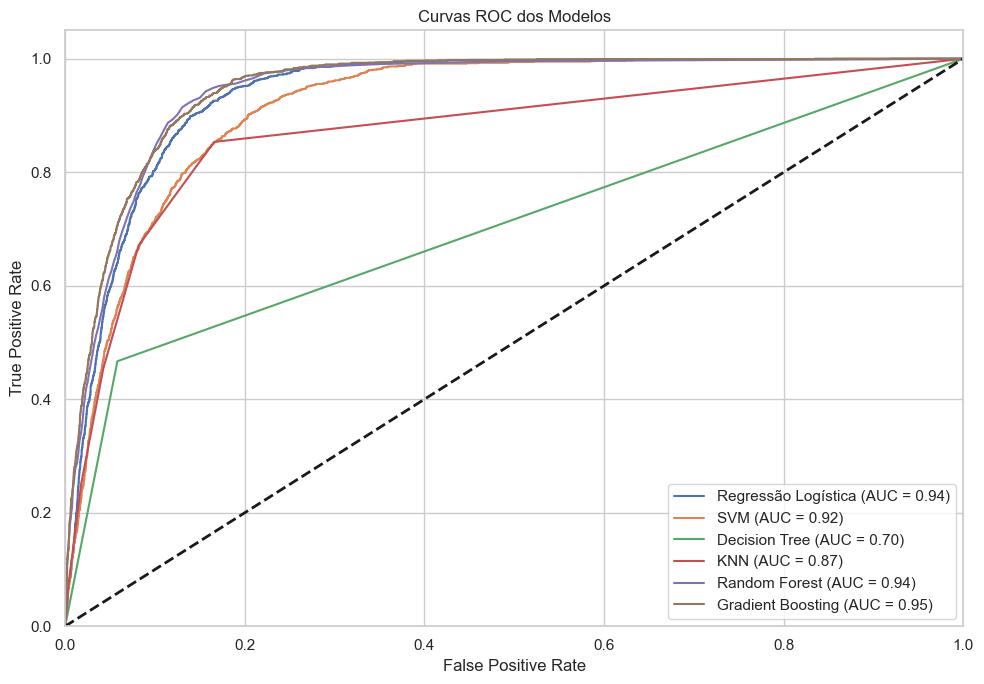

In [84]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 7))

for nome, modelo in modelos.items():
    y_proba = modelo.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{nome} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC dos Modelos')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [85]:
from sklearn.model_selection import cross_validate, StratifiedKFold
import pandas as pd

# Define validação cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Métricas apropriadas para classificação desbalanceada
scoring = ['balanced_accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Lista para armazenar resultados
resultados_cv = []

# Avaliação dos modelos
for nome, modelo in modelos.items():
    scores = cross_validate(modelo, X, y, cv=cv, scoring=scoring)

    resultados_cv.append([
        nome,
        scores['test_balanced_accuracy'].mean(), scores['test_balanced_accuracy'].std(),
        scores['test_precision'].mean(), scores['test_precision'].std(),
        scores['test_recall'].mean(), scores['test_recall'].std(),
        scores['test_f1'].mean(), scores['test_f1'].std(),
        scores['test_roc_auc'].mean(), scores['test_roc_auc'].std()
    ])

df_resultados_cv = pd.DataFrame(resultados_cv, columns=[
    'Modelo',
    'Balanced Accuracy (média)', 'Balanced Accuracy (std)',
    'Precision (média)', 'Precision (std)',
    'Recall (média)', 'Recall (std)',
    'F1-score (média)', 'F1-score (std)',
    'AUC-ROC (média)', 'AUC-ROC (std)'
])

df_resultados_cv = df_resultados_cv.sort_values('AUC-ROC (média)', ascending=False).round(3)

# Mostrar tabela
print("\nResumo da Validação Cruzada (5 folds):")
print(df_resultados_cv)


C:\Users\Cleópatra Dos Santos\ml-hands-on\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Cleópatra Dos Santos\ml-hands-on\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

KeyboardInterrupt: 

### 4.4 Otimização de hiperparâmetros.

Nesta secção, iremos abordar a importância da otimização de hiperparâmetros no contexto da aprendizagem automática supervisionada. Os hiperparâmetros são configurações externas aos modelos como a profundidade máxima de uma árvore, o número de vizinhos no KNN, ou a taxa de aprendizagem em algoritmos de boosting que influenciam diretamente o desempenho dos algoritmos, mas não são aprendidos durante o treino.

A escolha adequada destes valores pode fazer a diferença entre um modelo medíocre e um modelo de elevada performance. Assim, iremos explorar técnicas, como o Grid Search e o Random Search, para identificar as combinações de hiperparâmetros que maximizam a performance dos modelos nos dados de validação.


In [86]:
# 4.4 Otimização de hiperparâmetros para Gradient Boosting e Bagging (Random Forest)

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#  Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

gb = GradientBoostingClassifier(random_state=42)
grid_gb = GridSearchCV(gb, param_grid_gb, cv=5, scoring='roc_auc', n_jobs=-1)
grid_gb.fit(X_train, y_train)

print("Melhores hiperparâmetros Gradient Boosting:", grid_gb.best_params_)
print("Melhor score (AUC-ROC) CV:", grid_gb.best_score_)

# Avaliação no conjunto de teste
best_gb = grid_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test)
y_proba_gb = best_gb.predict_proba(X_test)[:, 1]
print("AUC-ROC no teste (GB):", roc_auc_score(y_test, y_proba_gb))

#  Bagging (Random Forest)
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Melhores hiperparâmetros Random Forest:", grid_rf.best_params_)
print("Melhor score (AUC-ROC) CV:", grid_rf.best_score_)

# Avaliação no conjunto de teste
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]
print("AUC-ROC no teste (RF):", roc_auc_score(y_test, y_proba_rf))

Melhores hiperparâmetros Gradient Boosting: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}
Melhor score (AUC-ROC) CV: 0.9473330182905935
AUC-ROC no teste (GB): 0.9504817771802652
Melhores hiperparâmetros Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Melhor score (AUC-ROC) CV: 0.9436097053245753
AUC-ROC no teste (RF): 0.9460575642981063


In [87]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

#  Gradient Boosting
param_dist_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': np.linspace(0.01, 0.2, 10),
    'max_depth': [3, 4, 5, 6, 7]
}

gb = GradientBoostingClassifier(random_state=42)
rand_gb = RandomizedSearchCV(
    gb, param_distributions=param_dist_gb, n_iter=10,
    cv=5, scoring='roc_auc', n_jobs=-1, random_state=42
)
rand_gb.fit(X_train, y_train)

print("Melhores hiperparâmetros Gradient Boosting (RandomizedSearchCV):", rand_gb.best_params_)
print("Melhor score (AUC-ROC) CV:", rand_gb.best_score_)

# Avaliação no conjunto de teste
best_gb = rand_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test)
y_proba_gb = best_gb.predict_proba(X_test)[:, 1]
print("AUC-ROC no teste (GB):", roc_auc_score(y_test, y_proba_gb))

# Bagging (Random Forest)
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 15, 20, 25],
    'min_samples_split': [2, 3, 5, 7]
}

rf = RandomForestClassifier(random_state=42)
rand_rf = RandomizedSearchCV(
    rf, param_distributions=param_dist_rf, n_iter=10,
    cv=5, scoring='roc_auc', n_jobs=-1, random_state=42
)
rand_rf.fit(X_train, y_train)

print("Melhores hiperparâmetros Random Forest (RandomizedSearchCV):", rand_rf.best_params_)
print("Melhor score (AUC-ROC) CV:", rand_rf.best_score_)

# Avaliação no conjunto de teste
best_rf = rand_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]
print("AUC-ROC no teste (RF):", roc_auc_score(y_test, y_proba_rf))

Melhores hiperparâmetros Gradient Boosting (RandomizedSearchCV): {'n_estimators': 200, 'max_depth': 4, 'learning_rate': np.float64(0.09444444444444444)}
Melhor score (AUC-ROC) CV: 0.9476387535771856
AUC-ROC no teste (GB): 0.9502061483508131
Melhores hiperparâmetros Random Forest (RandomizedSearchCV): {'n_estimators': 100, 'min_samples_split': 7, 'max_depth': 15}
Melhor score (AUC-ROC) CV: 0.9431083448526397
AUC-ROC no teste (RF): 0.9456895241389793


### 4.5 Seleção do melhor modelo e interpretação dos resultados

Após a otimização dos hiperparâmetros, os modelos Gradient Boosting e Random Forest apresentaram desempenhos muito elevados, especialmente na métrica AUC-ROC, que é a mais adequada para este problema devido ao desbalanceamento das classes.

Resumo dos resultados finais:
| Modelo            | AUC-ROC (CV) | AUC-ROC (Teste) | Hiperparâmetros Ótimos                          |
|-------------------|--------------|-----------------|-----------------------------------------------|
| Gradient Boosting | 0.9476       | 0.9502          | n_estimators=200, max_depth=4, learning_rate=0.094 |
| Random Forest     | 0.9431       | 0.9457          | n_estimators=100, max_depth=15, min_samples_split=7 |.

O Gradient Boosting apresentou o melhor desempenho, tanto na validação cruzada quanto no conjunto de teste, com um AUC-ROC de 0.9502. Indicando assim uma excelente capacidade de discriminação entre clientes que subscrevem ou não o depósito a prazo.

Interpretação dos resultados do melhor modelo-Gradient Boosting:

Relatório de classificação (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     10965
           1       0.67      0.55      0.61      1392

    accuracy                           0.92     12357
   macro avg       0.81      0.76      0.78     12357
weighted avg       0.91      0.92      0.92     12357



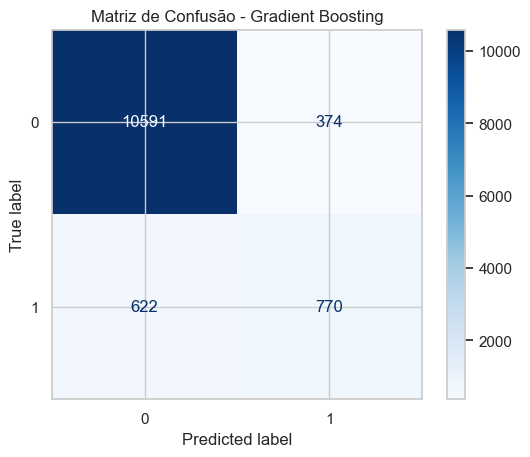

Top 10 variáveis mais importantes para o modelo:
duration            0.472162
nr.employed         0.249476
euribor3m           0.087892
pdays               0.035731
cons.conf.idx       0.027203
age                 0.025892
cons.price.idx      0.016680
month_oct           0.012101
poutcome_success    0.011202
campaign            0.006719
dtype: float64


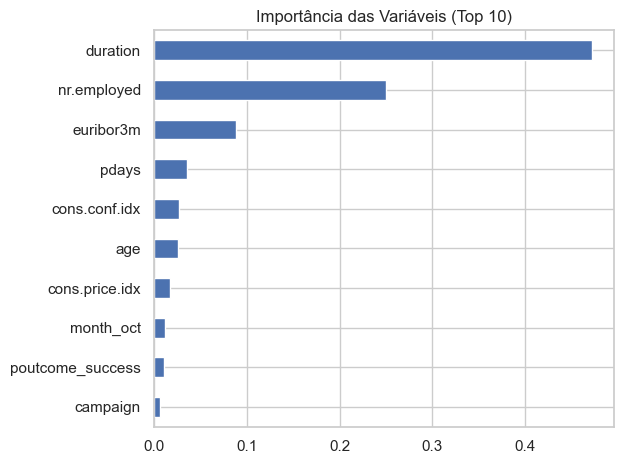

In [88]:
from sklearn.metrics import  confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Avaliação detalhada no conjunto de teste
print("Relatório de classificação (Gradient Boosting):")
print(classification_report(y_test, best_gb.predict(X_test)))

# Matriz de confusão
cm = confusion_matrix(y_test, best_gb.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão - Gradient Boosting")
plt.show()

# Importância das variáveis
importances = best_gb.feature_importances_
features = X_train.columns
import pandas as pd

feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)
print("Top 10 variáveis mais importantes para o modelo:")
print(feat_imp.head(10))
feat_imp.head(10).plot(kind='barh', title='Importância das Variáveis (Top 10)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()




O modelo Gradient Boosting revelou uma performance robusta, com uma AUC-ROC de **0.9502** no conjunto de teste, demonstrando excelente capacidade de discriminação entre os clientes que subscrevem e não subscrevem o depósito a prazo, mesmo perante um forte desbalanceamento das classes.

#### Desempenho nas Classes

* A classe majoritária (não subscrição) foi prevista com elevada precisão (**0.94**) e revocação (**0.97**), o que significa que o modelo raramente classifica erradamente um cliente que não subscreve.
* A classe minoritária (subscrição) obteve uma precisão de **0.67** e revocação de **0.55**, o que, apesar de mais modesto, é um bom resultado num problema com forte desbalanceamento.
* O **f1-score** de **0.61** para a classe positiva indica um equilíbrio razoável entre precisão e revocação, sendo especialmente relevante quando o objetivo é **detetar corretamente os clientes com maior propensão à subscrição**.

A matriz de confusão mostra:

* 770 verdadeiros positivos (clientes corretamente identificados como subscritores);
* 622 falsos negativos (subscritores que não foram detetados pelo modelo);
* 374 falsos positivos (clientes identificados como subscritores, mas que não o são);
* 10 591 verdadeiros negativos (clientes corretamente identificados como não subscritores).

Estes resultados revelam que o modelo é conservador na identificação de subscrições, o que é adequado em contextos onde o custo de contactar um cliente que não irá subscrever é superior ao custo de perder um subscritor.

#### Importância das Variáveis

As variáveis mais determinantes para o modelo foram:

1. **`duration` (47%)** – Tempo da última chamada é, de longe, o fator mais preditivo, sugerindo que chamadas mais longas estão fortemente associadas a uma maior probabilidade de subscrição.
2. **`nr.employed` (25%)** – Indicador macroeconómico que reflete o número de empregados. Pode refletir o clima económico geral e a confiança do consumidor.
3. **`euribor3m` (9%)** – Taxa de juro de referência, fortemente correlacionada com decisões de investimento e subscrição de produtos bancários.
4. **`pdays` (3.5%)** – Número de dias desde o último contacto, indicador importante de interesse anterior.
5. **`cons.conf.idx` e `cons.price.idx`** – Índices de confiança e preço do consumidor, que afetam o comportamento económico dos clientes.
6. **Variáveis sazonais e contextuais** como `month_oct`, `poutcome_success` e `campaign` mostram que o histórico de campanhas e o momento do ano também influenciam a decisão do cliente.

Este perfil de importância das variáveis oferece uma **interpretação acionável**: os gestores de campanha podem, por exemplo, concentrar-se em conversas mais detalhadas e personalizadas (aumentando a duração das chamadas), monitorizar o ciclo económico, e usar o histórico de contactos para melhor segmentação.



### 4.6 Análise crítica dos resultados obtidos.